# Basic Starter Steps

## Mount Google Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get the code from github

In [ ]:
!git clone https://github.com/SyedaMahamFahim/Inner_Speech_Dataset -q

## Install dependencies

*   List item
*   List item




In [ ]:
!pip3 install mne -q
!pip install h5io


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 77.2 MB/s eta 0:00:00


### Checking MNE version

In [ ]:
import mne
print(mne.__version__)

1.7.1


## Imports


In [ ]:
import mne
import warnings
import numpy as np

from google.colab import drive

from Inner_Speech_Dataset.Python_Processing.Data_extractions import  extract_data_from_subject,extract_block_data_from_subject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  select_time_window, transform_for_classificator,filter_by_condition,filter_by_class
from Inner_Speech_Dataset.Python_Processing.Utilitys import ensure_dir, unify_names

np.random.seed(23)

mne.set_log_level(verbose='warning') #to avoid info at terminal
warnings.filterwarnings(action = "ignore", category = DeprecationWarning )
warnings.filterwarnings(action = "ignore", category = FutureWarning )

## Variable for whole code

In [ ]:
### Hyperparameters

# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"

# Data Type
datatype = "eeg" # 3

# Sampling rate
fs = 256

# Select the useful par of each trial. Time in seconds
t_start = 1.5
t_end = 3.5




## Ensuring Folder exist

In [ ]:
import os

# Check if the directory exists, and if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Created directory: {save_dir}")
else:
    print(f"Directory already exists: {save_dir}")




Directory already exists: /content/drive/MyDrive/FinalFilterOuput


# **------------ Data extraction and filtration  ----------------**

## For Single File Block

### Variable

In [ ]:
# Subject number
N_B=2
N_S = 1   #[1 to 10]

### Data Extraction

In [ ]:
# Load all trials for a single block
print("Extracted from block")
X, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
X = X.get_data()  # Convert EpochsFIF object to numpy array
print(X.shape)

# Cut useful time. i.e action interval
X = select_time_window(X = X, t_start = t_start, t_end = t_end, fs = fs)
print("Useful Time")
print(X.shape)


Extracted from block
(200, 128, 1153)
Useful Time
(200, 128, 512)
Only Inner Condition
(80, 128, 512)
ALL Classes
(80, 4)


In [ ]:
print("Data shape: [trials x channels x samples]")
print(X.shape) # Trials, channels, samples
print(X)
print("Labels shape")
print(Y.shape) # Time stamp, class , condition, session
# print(Y)

Data shape: [trials x channels x samples]
(200, 128, 512)
[[[-1.02513480e-06 -2.97182405e-06 -4.15319738e-06 ... -4.46410542e-06
   -6.65452343e-06  7.08489580e-06]
  [-4.49203568e-07 -2.03831610e-06 -3.63745211e-06 ... -2.25310430e-06
   -3.69586614e-06  9.75129690e-06]
  [-1.50431891e-06 -3.61439551e-06 -3.69786677e-06 ... -2.60262682e-06
   -3.99191695e-06  9.73796342e-06]
  ...
  [-8.35771700e-06 -5.24462414e-06 -3.19152386e-06 ... -3.62041901e-06
   -6.92901719e-06  6.96256686e-06]
  [-5.52964743e-06 -5.06957423e-06  1.90176314e-07 ... -5.81086450e-06
   -8.79882977e-06  4.80443390e-06]
  [-6.50184192e-06 -6.02851307e-06 -1.23248013e-06 ... -5.42413379e-06
   -8.85240114e-06  3.80162812e-06]]

 [[-1.02930860e-05 -8.19610348e-07 -4.54271216e-06 ... -2.07197759e-05
   -1.01322115e-05 -1.36270172e-05]
  [-1.13510168e-05 -2.34107151e-06 -4.61845756e-06 ... -1.96427954e-05
   -9.76487321e-06 -1.23575101e-05]
  [-1.12825734e-05 -1.66409852e-06 -4.29376364e-06 ... -2.07103886e-05
   -9.8

### Filter By condition i.e Inner

In [ ]:
X_inner_speech, Y_inner_speech = filter_by_condition(X, Y, condition='Inner')

print(X_inner_speech.shape) # Trials, channels, samples
print(X_inner_speech[:2])
print("Labels shape")
print(Y_inner_speech.shape) # Time stamp, class , condition, session
print(Y_inner_speech[:5])
# here 3rd col is 1 because our condition is inner



(80, 128, 512)
[[[-8.20763985e-06 -6.14716505e-06 -1.62229350e-06 ...  2.42088716e-06
    1.21163267e-07 -7.33058517e-07]
  [-7.31900346e-06 -6.69376781e-06 -6.48381440e-07 ...  3.79685791e-06
    1.28126907e-06  1.27209812e-06]
  [-8.05590114e-06 -6.26310350e-06 -1.79536627e-06 ...  3.28918754e-06
    2.82916107e-06  1.63580932e-06]
  ...
  [ 3.82934768e-07  1.73515561e-06  1.17833248e-05 ...  1.84601926e-05
    8.54706875e-06  1.10845050e-05]
  [-9.77759230e-07 -3.40732593e-06  6.95235457e-06 ...  1.82531757e-05
    8.99488212e-06  1.26028610e-05]
  [-8.06635787e-07 -3.27045629e-06  8.13911448e-06 ...  1.79338463e-05
    9.10056728e-06  1.20425346e-05]]

 [[-1.56599022e-05 -1.36308952e-05 -7.64903583e-06 ...  8.67381326e-06
    3.86804203e-06 -2.57895856e-06]
  [-1.52934699e-05 -1.41249077e-05 -8.27963724e-06 ...  8.17245742e-06
    4.19376299e-06 -1.28341103e-06]
  [-1.53074047e-05 -1.42748310e-05 -6.80524020e-06 ...  7.61756993e-06
    3.13097283e-06 -2.29879310e-06]
  ...
  [-6.12

### Filter By class i.e ALL classes

In [ ]:
X_inner_speech, Y_inner_speech= filter_by_class(X_inner_speech, Y_inner_speech, 'ALL')
print(Y_inner_speech.shape)
print(Y_inner_speech[:5])

(200, 4)
[[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]]


## For Single Block full code

In [ ]:
# Load all trials for a single block
print("Extracted from block")
X, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
X = X.get_data()  # Convert EpochsFIF object to numpy array
print(X.shape)

# Cut useful time. i.e action interval
X = select_time_window(X = X, t_start = t_start, t_end = t_end, fs = fs)
print("Useful Time")
print(X.shape)

# Filter by Condition
X_inner_speech, Y_inner_speech = filter_by_condition(X, Y, condition='Inner')

print("Only Inner Condition")
print(X_inner_speech.shape) # Trials, channels, samples


# Filter by Class
X_inner_speech, Y_inner_speech= filter_by_class(X_inner_speech, Y_inner_speech, 'ALL')
print("ALL Classes")
print(Y_inner_speech.shape)

## For Single File

### Variable

In [ ]:
# Subject number
N_S = 1   #[1 to 10]

### Data Extraction

In [ ]:
# Load all trials for a single subject
X, Y = extract_data_from_subject(root_dir, N_S, datatype)

# Cut useful time. i.e action interval
X = select_time_window(X = X, t_start = t_start, t_end = t_end, fs = fs)

In [ ]:
print("Data shape: [trials x channels x samples]")
print(X.shape) # Trials, channels, samples
print(X[:2])
print("Labels shape")
print(Y.shape) # Time stamp, class , condition, session
print(Y)

Data shape: [trials x channels x samples]
(500, 128, 512)
[[[-1.20379933e-05 -1.95058757e-05 -2.01942158e-05 ...  3.08543223e-06
    7.04701281e-06  9.29442573e-06]
  [-1.17012976e-05 -1.91784380e-05 -1.92504174e-05 ...  2.08320559e-06
    7.65046259e-06  8.35493563e-06]
  [-1.29292041e-05 -2.01641640e-05 -1.94734098e-05 ...  2.79394564e-06
    6.66093819e-06  7.27726346e-06]
  ...
  [-1.82342995e-05 -2.50100884e-05 -2.67514861e-05 ...  5.23224111e-07
    4.52331057e-06  6.30095498e-06]
  [ 4.81687940e-06 -7.08986216e-06 -1.06735507e-05 ... -8.36106016e-06
   -3.79261698e-06 -1.80993958e-06]
  [ 5.00416655e-06 -6.37515261e-06 -1.06575486e-05 ... -9.99147706e-06
   -4.24358714e-06 -1.75924281e-06]]

 [[ 2.77703416e-06 -6.74925204e-06 -1.31109416e-05 ...  5.99739041e-06
    6.66551936e-06  2.54237357e-06]
  [ 4.49501959e-06 -6.75934237e-06 -1.23802743e-05 ...  6.27099328e-06
    6.51496953e-06  1.97233021e-06]
  [ 3.12756664e-06 -6.23128913e-06 -1.13302015e-05 ...  6.07433639e-06
    6.6

### Filter By condition i.e Inner

In [ ]:
X_inner_speech, Y_inner_speech = filter_by_condition(X, Y, condition='Inner')

print(X_inner_speech.shape) # Trials, channels, samples
print(X_inner_speech[:2])
print("Labels shape")
print(Y_inner_speech.shape) # Time stamp, class , condition, session
print(Y_inner_speech[:5])
# here 3rd col is 1 because our condition is inner



(200, 128, 512)
[[[ 6.56632558e-06  9.29798573e-06  2.67945790e-06 ...  1.61658549e-05
    1.04383488e-05  1.65976586e-05]
  [ 6.73392992e-06  9.67485813e-06  3.46813168e-06 ...  1.72691653e-05
    1.09798877e-05  1.68224439e-05]
  [ 6.44456485e-06  1.05683281e-05  4.08183062e-06 ...  1.62432293e-05
    1.10782575e-05  1.67439421e-05]
  ...
  [ 7.73143200e-06  1.17620983e-05  5.96924569e-06 ...  9.61573311e-07
   -5.92098200e-06 -5.22468805e-06]
  [ 1.22760126e-05  1.52803701e-05  1.24073505e-05 ... -2.36157544e-06
   -1.04331358e-05 -6.78143929e-06]
  [ 1.31543686e-05  1.57064520e-05  1.26855428e-05 ... -1.16832456e-06
   -9.74268987e-06 -7.23316007e-06]]

 [[ 6.43505384e-06  9.74383077e-06  6.49930296e-06 ... -6.37214082e-06
   -8.33546860e-07 -4.22231469e-06]
  [ 7.45222402e-06  1.14393787e-05  6.99356577e-06 ... -6.59965756e-06
   -2.04831862e-06 -4.04604928e-06]
  [ 5.98240239e-06  1.08866456e-05  7.46583983e-06 ... -6.70286066e-06
   -1.62460553e-06 -3.56255504e-06]
  ...
  [ 7.1

### Filter By class i.e ALL classes

In [ ]:
X_inner_speech, Y_inner_speech= filter_by_class(X_inner_speech, Y_inner_speech, 'ALL')
print(Y_inner_speech.shape)
print(Y_inner_speech[:5])

(200, 4)
[[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]]


## For Multpile Files

### Variables

In [ ]:
# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"

# Save options
save_bool = True
overwrite = True

# Subjets list for training
N_S_list = [1, 3, 4, 5, 6, 10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3



### Applying Loop on all files to get Data

In [ ]:
# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")


    # Load all trials for a single subject
    X, Y = extract_data_from_subject(root_dir, N_S, datatype)

    # Cut useful time. i.e action interval
    X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

    # Filter By condition i.e Inner
    X, Y = filter_by_condition(X, Y, condition='Inner')

    # Filter By class i.e ALL classes
    X, Y = filter_by_class(X, Y, 'ALL')
    # Append the data to the lists
    all_features.append(X)
    all_labels.append(Y)

# Stack all the features and labels
X_data = np.vstack(all_features)
Y_data = np.vstack(all_labels)

print("Combined Features shape:", X_data.shape)
print("Combined Labels shape:", Y_data.shape)
print("First few combined features:\n", X_data[:5])
print("First few combined labels:\n", Y_data[:5])

Subject: 1
Subject: 3
Subject: 4
Subject: 5
Subject: 6
Subject: 10
X_data
[[[ 2.43265769e-06 -1.01428557e-07  7.25519091e-06 ... -1.32315118e-07
   -6.09937833e-07  4.61667777e-06]
  [-8.24612803e-07 -4.30018556e-06  2.07329927e-06 ...  1.60251161e-07
    1.82958368e-07  3.81454099e-06]
  [ 1.06996405e-08 -4.24570819e-06  3.18898604e-06 ...  8.86767338e-07
    1.03292063e-06  5.44870152e-06]
  ...
  [-1.21219664e-06 -2.03216044e-06  1.17606921e-06 ... -4.88732753e-06
   -5.26748957e-06 -2.55922519e-06]
  [ 5.38904286e-06  5.61678599e-06  6.58025076e-06 ... -6.58402346e-06
   -8.42901673e-06 -6.15970355e-06]
  [ 4.48381734e-06  5.60973900e-06  5.42611555e-06 ... -6.79635071e-06
   -8.25751563e-06 -5.23444816e-06]]

 [[-1.92226540e-06 -1.00479285e-06 -3.75380862e-07 ... -6.20867017e-06
   -5.20980092e-06 -8.73323505e-06]
  [-4.27371176e-06 -3.54652783e-06 -3.18285473e-06 ... -5.66965388e-06
   -4.56361743e-06 -6.91029468e-06]
  [-5.63775250e-06 -5.03924926e-06 -3.18307702e-06 ... -5.8518

# **--------------------------- Basic Features Extraction\------------------------------------**



## For Single File

### Variable

In [ ]:
# Subject number
N_S = 1   #[1 to 10]

### Data Extraction

In [ ]:
# Load all trials for a single subject
X, Y = extract_data_from_subject(root_dir, N_S, datatype)

# Cut useful time. i.e action interval
X = select_time_window(X = X, t_start = t_start, t_end = t_end, fs = fs)

In [ ]:
print("Data shape: [trials x channels x samples]")
print(X.shape) # Trials, channels, samples
print(X[:2])
print("Labels shape")
print(Y.shape) # Time stamp, class , condition, session
print(Y)

Data shape: [trials x channels x samples]
(500, 128, 512)
[[[-1.20379933e-05 -1.95058757e-05 -2.01942158e-05 ...  3.08543223e-06
    7.04701281e-06  9.29442573e-06]
  [-1.17012976e-05 -1.91784380e-05 -1.92504174e-05 ...  2.08320559e-06
    7.65046259e-06  8.35493563e-06]
  [-1.29292041e-05 -2.01641640e-05 -1.94734098e-05 ...  2.79394564e-06
    6.66093819e-06  7.27726346e-06]
  ...
  [-1.82342995e-05 -2.50100884e-05 -2.67514861e-05 ...  5.23224111e-07
    4.52331057e-06  6.30095498e-06]
  [ 4.81687940e-06 -7.08986216e-06 -1.06735507e-05 ... -8.36106016e-06
   -3.79261698e-06 -1.80993958e-06]
  [ 5.00416655e-06 -6.37515261e-06 -1.06575486e-05 ... -9.99147706e-06
   -4.24358714e-06 -1.75924281e-06]]

 [[ 2.77703416e-06 -6.74925204e-06 -1.31109416e-05 ...  5.99739041e-06
    6.66551936e-06  2.54237357e-06]
  [ 4.49501959e-06 -6.75934237e-06 -1.23802743e-05 ...  6.27099328e-06
    6.51496953e-06  1.97233021e-06]
  [ 3.12756664e-06 -6.23128913e-06 -1.13302015e-05 ...  6.07433639e-06
    6.6

### Filter By condition i.e Inner

In [ ]:
X, Y = filter_by_condition(X, Y, condition='Inner')

print(X.shape) # Trials, channels, samples
print(X[:2])
print("Labels shape")
print(Y.shape) # Time stamp, class , condition, session
print(Y[:5])
# here 3rd col is 1 because our condition is inner



(200, 128, 512)
[[[ 6.56632558e-06  9.29798573e-06  2.67945790e-06 ...  1.61658549e-05
    1.04383488e-05  1.65976586e-05]
  [ 6.73392992e-06  9.67485813e-06  3.46813168e-06 ...  1.72691653e-05
    1.09798877e-05  1.68224439e-05]
  [ 6.44456485e-06  1.05683281e-05  4.08183062e-06 ...  1.62432293e-05
    1.10782575e-05  1.67439421e-05]
  ...
  [ 7.73143200e-06  1.17620983e-05  5.96924569e-06 ...  9.61573311e-07
   -5.92098200e-06 -5.22468805e-06]
  [ 1.22760126e-05  1.52803701e-05  1.24073505e-05 ... -2.36157544e-06
   -1.04331358e-05 -6.78143929e-06]
  [ 1.31543686e-05  1.57064520e-05  1.26855428e-05 ... -1.16832456e-06
   -9.74268987e-06 -7.23316007e-06]]

 [[ 6.43505384e-06  9.74383077e-06  6.49930296e-06 ... -6.37214082e-06
   -8.33546860e-07 -4.22231469e-06]
  [ 7.45222402e-06  1.14393787e-05  6.99356577e-06 ... -6.59965756e-06
   -2.04831862e-06 -4.04604928e-06]
  [ 5.98240239e-06  1.08866456e-05  7.46583983e-06 ... -6.70286066e-06
   -1.62460553e-06 -3.56255504e-06]
  ...
  [ 7.1

### Filter By class i.e ALL classes

In [ ]:

X, Y= filter_by_class(X, Y, 'ALL')
print(Y.shape)
print(Y[:5])

(200, 4)
[[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]]


### Extract Features From Epochs

In [ ]:
import numpy as np

# Assuming X is your data
# Example data shape: (num_epochs, num_channels, num_samples)
# Replace this with your actual data
# X = your_data

# Mean amplitude across all channels for each epoch
mean_amplitude = X.mean(axis=2)
print("Mean Amplitude:\n", mean_amplitude[:5])

# Standard deviation of amplitude across all channels for each epoch
std_amplitude = X.std(axis=2)
print("Standard Deviation Amplitude:\n", std_amplitude[:5])

# Variance of amplitude across all channels for each epoch
var_amplitude = X.var(axis=2)
print("Variance Amplitude:\n", var_amplitude[:5])

# Minimum amplitude across all channels for each epoch
min_amplitude = X.min(axis=2)
print("Minimum Amplitude:\n", min_amplitude[:5])

# Maximum amplitude across all channels for each epoch
max_amplitude = X.max(axis=2)
print("Maximum Amplitude:\n", max_amplitude[:5])

# Range (peak-to-peak) of amplitude across all channels for each epoch
ptp_amplitude = X.ptp(axis=2)
print("Peak-to-Peak Amplitude:\n", ptp_amplitude[:5])

# Index of minimum amplitude across all channels for each epoch
argmin_amplitude = X.argmin(axis=2)
print("Index of Minimum Amplitude:\n", argmin_amplitude[:5])

# Index of maximum amplitude across all channels for each epoch
argmax_amplitude = X.argmax(axis=2)
print("Index of Maximum Amplitude:\n", argmax_amplitude[:5])

# Combine extracted features into a feature matrix
features = np.hstack([mean_amplitude,
                      std_amplitude,
                      var_amplitude,
                      min_amplitude,
                      max_amplitude,
                      ptp_amplitude,
                      argmin_amplitude,
                      argmax_amplitude])

print("Features shape:", features.shape)
print("Features:\n", features[:5])


## For Multiple Files


### Variables

In [ ]:
# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"

# Save options
save_bool = True
overwrite = True

# Subjets list for training
N_S_list = [1, 3, 4, 5, 6, 10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate

### Extract Feature Function

In [ ]:
def extract_and_process_features(root_dir, N_S, t_start, t_end, fs):
    # Load all trials for a single subject
    X, Y = extract_data_from_subject(root_dir, N_S, datatype)

    # Cut useful time. i.e action interval
    X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

    # Filter By condition i.e Inner
    X, Y = filter_by_condition(X, Y, condition='Inner')

    # Filter By class i.e ALL classes
    X, Y = filter_by_class(X, Y, 'ALL')

    # Mean amplitude across all channels for each epoch
    mean_amplitude = X.mean(axis=2)

    # Standard deviation of amplitude across all channels for each epoch
    std_amplitude = X.std(axis=2)

    # Variance of amplitude across all channels for each epoch
    var_amplitude = X.var(axis=2)

    # Minimum amplitude across all channels for each epoch
    min_amplitude = X.min(axis=2)

    # Maximum amplitude across all channels for each epoch
    max_amplitude = X.max(axis=2)

    # Range (peak-to-peak) of amplitude across all channels for each epoch
    ptp_amplitude = X.ptp(axis=2)

    # Index of minimum amplitude across all channels for each epoch
    argmin_amplitude = X.argmin(axis=2)

    # Index of maximum amplitude across all channels for each epoch
    argmax_amplitude = X.argmax(axis=2)

    # Combine extracted features into a feature matrix
    features = np.hstack([mean_amplitude,
                          std_amplitude,
                          var_amplitude,
                          min_amplitude,
                          max_amplitude,
                          ptp_amplitude,
                          argmin_amplitude,
                          argmax_amplitude])

    return features, Y


### Applying Loop on all files to get Data

In [ ]:
# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")

    # Extract and process features for each subject
    features, labels = extract_and_process_features(root_dir, N_S, t_start, t_end, fs)

    # Append the data to the lists
    all_features.append(features)
    all_labels.append(labels)

# Stack all the features and labels
X_data = np.vstack(all_features)
Y_data = np.vstack(all_labels)

print("Combined Features shape:", X_data.shape)
print("Combined Labels shape:", Y_data.shape)
print("First few combined features:\n", X_data[:5])
print("First few combined labels:\n", Y_data[:5])

Subject: 1
Subject: 3
Subject: 4
Subject: 5
Subject: 6
Subject: 10
X_data
[[[ 2.43265769e-06 -1.01428557e-07  7.25519091e-06 ... -1.32315118e-07
   -6.09937833e-07  4.61667777e-06]
  [-8.24612803e-07 -4.30018556e-06  2.07329927e-06 ...  1.60251161e-07
    1.82958368e-07  3.81454099e-06]
  [ 1.06996405e-08 -4.24570819e-06  3.18898604e-06 ...  8.86767338e-07
    1.03292063e-06  5.44870152e-06]
  ...
  [-1.21219664e-06 -2.03216044e-06  1.17606921e-06 ... -4.88732753e-06
   -5.26748957e-06 -2.55922519e-06]
  [ 5.38904286e-06  5.61678599e-06  6.58025076e-06 ... -6.58402346e-06
   -8.42901673e-06 -6.15970355e-06]
  [ 4.48381734e-06  5.60973900e-06  5.42611555e-06 ... -6.79635071e-06
   -8.25751563e-06 -5.23444816e-06]]

 [[-1.92226540e-06 -1.00479285e-06 -3.75380862e-07 ... -6.20867017e-06
   -5.20980092e-06 -8.73323505e-06]
  [-4.27371176e-06 -3.54652783e-06 -3.18285473e-06 ... -5.66965388e-06
   -4.56361743e-06 -6.91029468e-06]
  [-5.63775250e-06 -5.03924926e-06 -3.18307702e-06 ... -5.8518

### Saving File

In [ ]:
if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput"
    file_name = save_dir + "/Basic_Features_Combined.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")

### Full Code

In [ ]:
import numpy as np

### ---- Processing Variables ---- ###

# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"

# Save options
save_bool = True
overwrite = True

# Subjets list for training
N_S_list = [1, 3, 4, 5, 6, 10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate

### Define Functions ###

def extract_and_process_features(root_dir, N_S, t_start, t_end, fs):
    # Load all trials for a single subject
    X, Y = extract_data_from_subject(root_dir, N_S, datatype)

    # Cut useful time. i.e action interval
    X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

    # Filter By condition i.e Inner
    X, Y = filter_by_condition(X, Y, condition='Inner')

    # Filter By class i.e ALL classes
    X, Y = filter_by_class(X, Y, 'ALL')

    # Mean amplitude across all channels for each epoch
    mean_amplitude = X.mean(axis=2)

    # Standard deviation of amplitude across all channels for each epoch
    std_amplitude = X.std(axis=2)

    # Variance of amplitude across all channels for each epoch
    var_amplitude = X.var(axis=2)

    # Minimum amplitude across all channels for each epoch
    min_amplitude = X.min(axis=2)

    # Maximum amplitude across all channels for each epoch
    max_amplitude = X.max(axis=2)

    # Range (peak-to-peak) of amplitude across all channels for each epoch
    ptp_amplitude = X.ptp(axis=2)

    # Index of minimum amplitude across all channels for each epoch
    argmin_amplitude = X.argmin(axis=2)

    # Index of maximum amplitude across all channels for each epoch
    argmax_amplitude = X.argmax(axis=2)

    # Combine extracted features into a feature matrix
    features = np.hstack([mean_amplitude,
                          std_amplitude,
                          var_amplitude,
                          min_amplitude,
                          max_amplitude,
                          ptp_amplitude,
                          argmin_amplitude,
                          argmax_amplitude])

    return features, Y

### ---- Main Processing Loop ---- ###

# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")

    # Extract and process features for each subject
    features, labels = extract_and_process_features(root_dir, N_S, t_start, t_end, fs)

    # Append the data to the lists
    all_features.append(features)
    all_labels.append(labels)

# Stack all the features and labels
X_data = np.vstack(all_features)
Y_data = np.vstack(all_labels)

print("Combined Features shape:", X_data.shape)
print("Combined Labels shape:", Y_data.shape)
print("First few combined features:\n", X_data[:5])
print("First few combined labels:\n", Y_data[:5])

### ---- Save the Combined Data ---- ###

if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput"
    file_name = save_dir + "/Combined_Features.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")



Processing Subject: 1
Processing Subject: 3
Processing Subject: 4
Processing Subject: 5
Processing Subject: 6
Processing Subject: 10
Combined Features shape: (1316, 1024)
Combined Labels shape: (1316, 4)
First few combined features:
 [[-1.44926440e-07 -2.41274164e-07 -1.65853606e-07 ...  5.67000000e+02
   3.87000000e+02  3.87000000e+02]
 [ 3.57391801e-07  5.32243938e-07  5.21395542e-07 ...  1.13000000e+02
   1.13000000e+02  1.13000000e+02]
 [ 6.80624934e-07  7.57871880e-07  7.30686012e-07 ...  3.04000000e+02
   3.04000000e+02  3.04000000e+02]
 [-1.70592281e-06 -1.61237645e-06 -1.68455752e-06 ...  4.22000000e+02
   3.19000000e+02  3.19000000e+02]
 [ 2.39105022e-06  2.28492377e-06  2.37352073e-06 ...  5.40000000e+02
   4.96000000e+02  4.96000000e+02]]
First few combined labels:
 [[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]]
Saving combined features and labels to: /content/drive/M

# **--------------------------- FOR PSD ------------------------------------**



## Computer PSD On A Single File



### Processing Variables


In [ ]:
# Data filtering
datatype = "eeg"

N_S=1
N_B=1

# Time window
tmin = 0.5
tmax = 3

# PSD Parameters
fmin = 0.5
fmax = 100
n_overlap = 0
n_fft = 256
picks = "all"
average = "mean"

### Data Extraction and Filtering

In [ ]:

X_S, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
print("X_S.get_montage()")
print(X_S.get_montage())
print(X_S.metadata)
print(X_S.ch_names)
(X_data.shape[1])
channel_name=X_S.ch_names
print(channel_name)

# Set Montage
Adquisition_eq = "biosemi128"
montage = mne.channels.make_standard_montage(Adquisition_eq)
X_S.set_montage(montage)
# print(X_S._data )

X, Y = extract_data_from_subject(root_dir, N_S, datatype)

X, Y= filter_by_condition(X, Y, condition='Inner')


print("Features")
print(X[:1])
print("Labels")
print(Y[:1])
# X_data = X
# # X_S._data = X_data

X_S.get_montage()
None
None
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 

### Compute PSD

In [ ]:
# print(X_S)
# print(X_S)

# Create an info object
info = mne.create_info(ch_names=[str(i) for i in range(X.shape[1])],
                       sfreq=256, ch_types="eeg")
print("Info",info)

# Create a new Epochs object with the combined data
epochs_combined = mne.EpochsArray(X, info)
print('epochs_combined',epochs_combined)
# Set the montage
montage = mne.channels.make_standard_montage("biosemi128")
print(montage)
epochs_combined.set_montage(montage)
# Calculate PSD for a particular class in a
# particular condition for the selected subjects
# print("Calculated PSD for Class: " + Classes + " in Condition: " + Cond)
# print("with the information of Subjects: " + str(N_S_list))
# Try to compute PSD and see what it returns directly
# psd_result = X.compute_psd(method='welch', fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax, picks=picks)


Info <Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 128 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: []
 sfreq: 256.0 Hz
>
epochs_combined <EpochsArray |  200 events (all good), 0 – 4.5 s, baseline off, ~225.3 MB, data loaded,
 '1': 200>
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 128 channels>


ValueError: DigMontage is only a subset of info. There are 128 channel positions not present in the DigMontage. The channels missing from the montage are:

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

### Print PSD Result

In [ ]:
# Now print what psd_result contains
print(type(psd_result))
print(psd_result.average())

print(Y[:10])

# Extract PSD values and frequency bins from the Power Spectrum object
psds = psd_result.get_data()  # This method typically exists for MNE data container objects; adjust if needed
freqs = psd_result.freqs  # This should be an attribute or similar; check documentation for exact usage

print("psds")

print(psds[:1])
print("freqs")
print(freqs[:2])
# Printing shapes and some data to confirm
print("PSDs shape:", psds.shape)
# print("First few PSD values for the first channel:", psds[0, 0, :])
# print("Frequency bins:", freqs)

# Print basic statistics of the PSD data
print("PSD Data Statistics:")
print("Mean:", psds.mean())
print("Standard Deviation:", psds.std())
print("Min:", psds.min())
print("Max:", psds.max())

<class 'mne.time_frequency.spectrum.EpochsSpectrum'>
<Averaged Power Spectrum (from Epochs, welch method) | 128 channels × 249 freqs, 0.8-99.8 Hz>
[[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]
 [394471      0      1      1]
 [400870      2      1      1]
 [407629      3      1      1]
 [421964      3      1      1]
 [428808      1      1      1]]
psds
[[[5.58310692e-13 6.88665798e-12 2.76898044e-12 ... 1.04520127e-14
   5.72582572e-14 3.35007486e-14]
  [9.95092906e-13 6.92519272e-12 2.69443085e-12 ... 9.78960325e-15
   3.31086761e-14 3.93742783e-14]
  [6.15558335e-13 6.98777302e-12 3.28460166e-12 ... 1.19081860e-14
   7.74264027e-14 5.81677337e-14]
  ...
  [1.05283612e-11 1.42395743e-11 7.53426202e-13 ... 5.99185988e-14
   2.04739239e-13 2.64906292e-14]
  [1.62572353e-11 6.08037505e-12 4.50453171e-12 ... 1.52026496e-13
   2.73946903e-13 2.22079813e-14]
  [1.67552999e-11 5.637613

### Save PSD File

In [ ]:
# Save PSD results
file_name = save_dir + "/"+ "PSD_" + str(N_S) + "_PSD-tfr.npz"

print(file_name)
# # Save the data to a single npz file
np.savez(file_name, psds=psds, freqs=freqs,labels=Y)


/content/drive/MyDrive/FinalFilterOuput/PSD_1_1_PSD-tfr.npz


### Plot PSD

In [ ]:

import matplotlib.pyplot as plt

# # Choose a channel to plot
channel_index = 0  # Change as needed
plt.figure(figsize=(10, 5))
plt.plot(freqs, psds[0, channel_index, :], label=f'Channel {channel_index+1}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density across Frequencies')
plt.legend()
plt.show()

### Checking Saved PSD file .h5 format


In [ ]:
import h5py

# Define the file path for the single PSD file you have processed
file_path = '/content/drive/MyDrive/FinalFilterOuput/PSD_Subject_1_Inner_ALL_PSD-tfr.h5'

# Load the data from the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Load the PSD data
    psds = f['mnepython/key_data'][:]
    # You may need to adjust these paths based on your actual structure
    freqs = f['mnepython/key_dims/idx_2'][:]  # Assuming these are frequency bins
    # Check if there are labels stored in the file, you may need to adjust the path
    labels = f['mnepython/key_dims/idx_0'][:] if 'mnepython/key_dims/idx_0' in f else None

# Print the shape of the loaded data
print("Loaded PSDs shape:", psds.shape)
print("Loaded Frequency bins:", freqs.shape)

if labels is not None:
    print("Loaded Labels shape:", labels.shape)
    print("First few labels:", labels[:5])

# Print basic statistics of the PSD data
print("PSD Data Statistics:")
print("Mean:", psds.mean())
print("Standard Deviation:", psds.std())
print("Min:", psds.min())
print("Max:", psds.max())

# Example of printing the first few PSD values for the first channel
print("First few PSD values for the first channel:", psds[0, 0, :10])


Loaded PSDs shape: (200, 128, 249)
Loaded Frequency bins: (4,)
Loaded Labels shape: (5,)
First few labels: [101 112 111  99 104]
PSD Data Statistics:
Mean: 1.1692361473167383e-12
Standard Deviation: 1.6486587279738783e-10
Min: 4.404309059090443e-20
Max: 3.8468860274689486e-07
First few PSD values for the first channel: [5.58310692e-13 6.88665798e-12 2.76898044e-12 2.81986455e-12
 1.37722359e-13 3.77932348e-12 2.76836888e-12 2.82697794e-12
 1.51178302e-12 1.76842952e-12]


## Computer PSD On A Multiple Files


#### Processing Variables


In [ ]:
import numpy as np
import mne

### ---- Processing Variables ---- ###

# Save options
save_bool = False
overwrite = True

# Subjets list
N_S_list = [1,2, 3, 4, 5, 6,7,8,9,10]  # for training
# N_S_list = [2,7,8,9]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
tmin = 0.5
tmax = 3

# PSD Parameters
fmin = 0.5
fmax = 100
n_overlap = 0
n_fft = 256
picks = "all"
average = "mean"

# Load data from the first subject to get the channel names
N_S = 1
N_B = 1

### Set up the EEG data structure and Set Montage



In [ ]:
# Load a single subject's data to set up the EEG data structure.
# This initial loading is crucial for establishing a framework for how EEG data should be handled in subsequent analyses.
# It involves:
# 1. Loading EEG data from one block of one subject to instantiate an Epochs object.
#    This object is used to store and manipulate segments of the EEG data consistently.
# 2. Setting the montage with 'biosemi128', a standard layout for EEG electrodes.
#    The montage ensures the software knows the exact location of each electrode on the scalp,
#    which is essential for accurate spatial analysis of EEG signals.
# This process sets up a template for processing additional EEG data with uniform settings and methods.


# Load data from the first subject to get the channel names
N_S = 1
N_B = 1

X_S, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
print("Extracting Data from 1 block to get channel names")
channel_names = X_S.ch_names
print("Channel names:", channel_names)

# Initialize an empty list to hold all the epochs data
all_epochs_data = []
all_labels = []



Extracting Data from 1 block to get channel names
Channel names: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']


### Applying Loop on all files to get Data

In [ ]:
# Loop through all subjects
for N_S in N_S_list:
    print("Subject: " + str(N_S))

    # Load the data for the subject
    X_s, Y = extract_data_from_subject(root_dir, N_S, datatype="eeg")

    # Filter by condition
    X_cond, Y_cond = filter_by_condition(X_s, Y, condition=Cond)

    # Filter by class
    X_cond, Y_cond = filter_by_class(X_cond, Y_cond, Classes)

    # Append the data to the list
    all_epochs_data.append(X_cond)
    all_labels.append(Y_cond)

    print("X_cond shape:", X_cond.shape)
    print("Y_cond shape:", Y_cond.shape)
    print("First few X_cond values:", X_cond[:2])
    print("First few Y_cond values:", Y_cond[:2])

# Stack all the data
X_data = np.vstack(all_epochs_data)
Y_data = np.vstack(all_labels)
print("Combined X_data shape:", X_data.shape)
print("Combined Y_data shape:", Y_data.shape)
print("First few X_data values:", X_data[:2])
print("First few Y_data values:", Y_data[:2])

Subject: 1
Subject: 3
Subject: 4
Subject: 5
Subject: 6
Subject: 10
X_data
[[[ 2.43265769e-06 -1.01428557e-07  7.25519091e-06 ... -1.32315118e-07
   -6.09937833e-07  4.61667777e-06]
  [-8.24612803e-07 -4.30018556e-06  2.07329927e-06 ...  1.60251161e-07
    1.82958368e-07  3.81454099e-06]
  [ 1.06996405e-08 -4.24570819e-06  3.18898604e-06 ...  8.86767338e-07
    1.03292063e-06  5.44870152e-06]
  ...
  [-1.21219664e-06 -2.03216044e-06  1.17606921e-06 ... -4.88732753e-06
   -5.26748957e-06 -2.55922519e-06]
  [ 5.38904286e-06  5.61678599e-06  6.58025076e-06 ... -6.58402346e-06
   -8.42901673e-06 -6.15970355e-06]
  [ 4.48381734e-06  5.60973900e-06  5.42611555e-06 ... -6.79635071e-06
   -8.25751563e-06 -5.23444816e-06]]

 [[-1.92226540e-06 -1.00479285e-06 -3.75380862e-07 ... -6.20867017e-06
   -5.20980092e-06 -8.73323505e-06]
  [-4.27371176e-06 -3.54652783e-06 -3.18285473e-06 ... -5.66965388e-06
   -4.56361743e-06 -6.91029468e-06]
  [-5.63775250e-06 -5.03924926e-06 -3.18307702e-06 ... -5.8518

### Creating MNE Info object

In [ ]:
# Create an MNE Info object with correct channel names
info = mne.create_info(ch_names=channel_names, sfreq=256, ch_types="eeg")
print("MNE Info object created with channel names and sampling frequency.")
print(info)

# Create the epochs object
epochs_combined = mne.EpochsArray(X_data, info)
print("EpochsArray object created with combined data.")
print(epochs_combined)
# Set the montage
montage = mne.channels.make_standard_montage("biosemi128")
print("Montage object created with biosemi128 montage.")
print(montage)
epochs_combined.set_montage(montage, match_case=False)
print("Montage set for the EpochsArray object.")
print(epochs_combined)

### Calculate PSD

In [ ]:
# Calculate PSD
print("Calculating PSD for the combined data...")
psd_result = epochs_combined.compute_psd(method='welch', fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax, picks=picks)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 128 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: []
 sfreq: 256.0 Hz
>


### Display PSD Data

In [ ]:
# Extract PSD values and frequency bins from the Power Spectrum object
psds = psd_result.get_data()
freqs = psd_result.freqs

# Print some statistics for verification
print("PSDs shape:", psds.shape)
print("Frequency bins shape:", freqs.shape)
print("First few PSD values for the first channel:", psds[0, 0, :10])

### Save PSD

In [ ]:
# Save PSD results
save_dir = "/content/drive/MyDrive/FinalFilterOuput"
file_name = save_dir + "/Testing_PSD_combined_PSD-tfr.npz"
print("Saving PSD results to:", file_name)
np.savez(file_name, psds=psds, freqs=freqs, labels=Y_data)

print("PSD calculation and saving completed.")

### Combine File


In [ ]:
import numpy as np

# Define file paths
training_file_path = '/content/drive/MyDrive/FinalFilterOuput/PSD_combined_PSD-tfr.npz'
testing_file_path = '/content/drive/MyDrive/FinalFilterOuput/Testing_PSD_combined_PSD-tfr.npz'
combined_file_path = '/content/drive/MyDrive/FinalFilterOuput/All_Subjects_Combined_PSD-tfr.npz'

# Load the training data
training_data = np.load(training_file_path)
psds_train = training_data['psds']
freqs_train = training_data['freqs']
labels_train = training_data['labels']

# Load the testing data
testing_data = np.load(testing_file_path)
psds_test = testing_data['psds']
freqs_test = testing_data['freqs']
labels_test = testing_data['labels']

# Check if frequency bins are the same
if not np.array_equal(freqs_train, freqs_test):
    raise ValueError("Frequency bins in training and testing data do not match.")

# Combine the PSDs and labels
psds_combined = np.concatenate((psds_train, psds_test), axis=0)
labels_combined = np.concatenate((labels_train, labels_test), axis=0)

# Save the combined data into a new npz file
np.savez(combined_file_path, psds=psds_combined, freqs=freqs_train, labels=labels_combined)

print("Combined PSDs shape:", psds_combined.shape)
print("Combined labels shape:", labels_combined.shape)
print("Combined data saved to:", combined_file_path)


Combined PSDs shape: (2236, 128, 249)
Combined labels shape: (2236, 4)
Combined data saved to: /content/drive/MyDrive/FinalFilterOuput/All_Subjects_Combined_PSD-tfr.npz


### Full Code

In [ ]:
import numpy as np
import mne

### ---- Processing Variables ---- ###

# Save options
save_bool = False
overwrite = True

# Subjets list
N_S_list=[2]
# N_S_list = [1,2, 3, 4, 5, 6,7,8,9,10]  # for training
# N_S_list = [2,7,8,9]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
tmin = 0.5
tmax = 3

# PSD Parameters
fmin = 0.5
fmax = 100
n_overlap = 0
n_fft = 256
picks = "all"
average = "mean"

# Load data from the first subject to get the channel names
N_S = 1
N_B = 1

X_S, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
print("Extracting Data from 1 block to get channel names")
channel_names = X_S.ch_names
print("Channel names:", channel_names)

# Initialize an empty list to hold all the epochs data
all_epochs_data = []
all_labels = []

# Loop through all subjects
for N_S in N_S_list:
    print("Subject: " + str(N_S))

    # Load the data for the subject
    X_s, Y = extract_data_from_subject(root_dir, N_S, datatype="eeg")

    # Filter by condition
    X_cond, Y_cond = filter_by_condition(X_s, Y, condition=Cond)

    # Filter by class
    X_cond, Y_cond = filter_by_class(X_cond, Y_cond, Classes)

    # Append the data to the list
    all_epochs_data.append(X_cond)
    all_labels.append(Y_cond)

    print("X_cond shape:", X_cond.shape)
    print("Y_cond shape:", Y_cond.shape)
    print("First few X_cond values:", X_cond[:2])
    print("First few Y_cond values:", Y_cond[:2])

# Stack all the data
X_data = np.vstack(all_epochs_data)
Y_data = np.vstack(all_labels)
print("Combined X_data shape:", X_data.shape)
print("Combined Y_data shape:", Y_data.shape)
print("First few X_data values:", X_data[:2])
print("First few Y_data values:", Y_data[:2])

# Create an MNE Info object with correct channel names
info = mne.create_info(ch_names=channel_names, sfreq=256, ch_types="eeg")
print("MNE Info object created with channel names and sampling frequency.")
print(info)

# Create the epochs object
epochs_combined = mne.EpochsArray(X_data, info)
print("EpochsArray object created with combined data.")
print(epochs_combined)
# Set the montage
montage = mne.channels.make_standard_montage("biosemi128")
print("Montage object created with biosemi128 montage.")
print(montage)
epochs_combined.set_montage(montage, match_case=False)
print("Montage set for the EpochsArray object.")
print(epochs_combined)
# Calculate PSD
print("Calculating PSD for the combined data...")
psd_result = epochs_combined.compute_psd(method='welch', fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax, picks=picks)

# Extract PSD values and frequency bins from the Power Spectrum object
psds = psd_result.get_data()
freqs = psd_result.freqs

# Print some statistics for verification
print("PSDs shape:", psds.shape)
print("Frequency bins shape:", freqs.shape)
print("First few PSD values for the first channel:", psds[0, 0, :10])

# Save PSD results
save_dir = "/content/drive/MyDrive/FinalFilterOuput"
file_name = save_dir + "/All_Subjects_PSD_combined_PSD-tfr.npz"
print("Saving PSD results to:", file_name)
np.savez(file_name, psds=psds, freqs=freqs, labels=Y_data)

print("PSD calculation and saving completed.")


Extracting Data from 1 block to get channel names
Channel names: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']
Subject: 1
X_cond shape: (200, 128, 1153)
Y_cond shape: (200, 4)
First few

## Model Train

### Model Train on Single file

#### Load the Data

In [ ]:
import numpy as np

# Define the path to load the npz file
npz_load_path = '/content/drive/MyDrive/FinalFilterOuput/PSD_combined_PSD-tfr.npz'

# Load the data from the npz file
data = np.load(npz_load_path)

print(data)
# # Extract PSDs and frequency bins
psds = data['psds']
freqs = data['freqs']
labels= data['labels']

# Print the shape of the loaded data

print("Loaded PSDs shape:", psds.shape)
print(psds[:1])
print("Loaded Frequency bins shape:", freqs.shape)
print(freqs[:10])
print("Loaded Labels shape:", labels.shape)
print(labels[:10])

NpzFile '/content/drive/MyDrive/FinalFilterOuput/PSD_combined_PSD-tfr.npz' with keys: psds, freqs, labels
Loaded PSDs shape: (1316, 128, 249)
[[[1.51636208e-11 7.68882141e-12 1.64987982e-12 ... 2.44598148e-14
   1.21454432e-14 3.23524730e-14]
  [1.43350472e-11 7.34710662e-12 2.02088469e-12 ... 3.02456991e-15
   1.27520225e-15 3.66522148e-14]
  [1.44793708e-11 7.61140754e-12 2.00231467e-12 ... 1.36192863e-14
   1.58106593e-14 3.18731430e-14]
  ...
  [2.41929065e-12 1.13674614e-11 4.44848201e-13 ... 1.02473850e-13
   2.13724987e-13 1.17201110e-13]
  [4.67206044e-12 6.98626960e-12 5.04328584e-12 ... 2.77688178e-13
   3.24863004e-13 1.34013751e-13]
  [4.87694102e-12 6.87090857e-12 4.68513193e-12 ... 2.00104786e-13
   2.67097852e-13 1.01777490e-13]]]
Loaded Frequency bins shape: (249,)
[0.79875195 1.19812793 1.5975039  1.99687988 2.39625585 2.79563183
 3.1950078  3.59438378 3.99375975 4.39313573]
Loaded Labels shape: (1316, 4)
[[351788      1      1      1]
 [358546      1      1      1]
 [

#### Spliting Dataset


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Reshape PSD data for CNN input
# Current shape is (200, 128, 249)
# Required shape is (200, 128, 249, 1) for CNN input
psds = psds[..., np.newaxis]

print(psds.shape)
# One-hot encode labels (assuming labels are in the second column of the labels array)
encoder = OneHotEncoder(sparse=False)
labels_one_hot = encoder.fit_transform(labels[:, 1].reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(psds, labels_one_hot, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test[:10])
print("Testing labels shape:", y_test.shape)


(1316, 128, 249, 1)
Training data shape: (1052, 128, 249, 1)
Testing data shape: (264, 128, 249, 1)
Training labels shape: (1052, 4)
Testing labels shape: [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
Testing labels shape: (264, 4)


#### Train Model

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 249, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels[:, 1])), activation='softmax')  # Number of classes should match the number of unique labels
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
5/5 [==============================] - 16s 2s/step - loss: 1.3868 - accuracy: 0.2000 - val_loss: 1.3859 - val_accuracy: 0.2750
Epoch 2/10
5/5 [==============================] - 14s 3s/step - loss: 1.3908 - accuracy: 0.2750 - val_loss: 1.3858 - val_accuracy: 0.2750
Epoch 3/10
5/5 [==============================] - 14s 3s/step - loss: 1.3856 - accuracy: 0.2688 - val_loss: 1.3863 - val_accuracy: 0.2000
Epoch 4/10
5/5 [==============================] - 13s 3s/step - loss: 1.3863 - accuracy: 0.2250 - val_loss: 1.3864 - val_accuracy: 0.2000
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 1.3863 - accuracy: 0.2937 - val_loss: 1.3870 - val_accuracy: 0.2000
Epoch 6/10
5/5 [==============================] - 12s 2s/step - loss: 1.3862 - accuracy: 0.2688 - val_loss: 1.3876 - val_accuracy: 0.2000
Epoch 7/10
5/5 [==============================] - 14s 3s/step - loss: 1.3859 - accuracy: 0.2500 - val_loss: 1.3878 - val_accuracy: 0.2000
Epoch 8/10
5/5 [==================

## Model training on testing and training file

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define file paths
training_file_path = '/content/drive/MyDrive/FinalFilterOuput/PSD_combined_PSD-tfr.npz'
testing_file_path = '/content/drive/MyDrive/FinalFilterOuput/Testing_PSD_combined_PSD-tfr.npz'

# Load the training data
training_data = np.load(training_file_path)
psds_train = training_data['psds']
freqs_train = training_data['freqs']
labels_train = training_data['labels']

# Load the testing data
testing_data = np.load(testing_file_path)
psds_test = testing_data['psds']
freqs_test = testing_data['freqs']
labels_test = testing_data['labels']

# Print data shapes
print("Training PSDs shape:", psds_train.shape)
print("Training labels shape:", labels_train.shape)
print("Testing PSDs shape:", psds_test.shape)
print("Testing labels shape:", labels_test.shape)

# Reshape PSD data for CNN input
psds_train = psds_train[..., np.newaxis]
psds_test = psds_test[..., np.newaxis]

# One-hot encode labels (assuming labels are in the second column of the labels array)
encoder = OneHotEncoder(sparse=False)
labels_train_one_hot = encoder.fit_transform(labels_train[:, 1].reshape(-1, 1))
labels_test_one_hot = encoder.transform(labels_test[:, 1].reshape(-1, 1))

# Print reshaped data shapes
print("Reshaped training PSDs shape:", psds_train.shape)
print("Reshaped testing PSDs shape:", psds_test.shape)
print("One-hot encoded training labels shape:", labels_train_one_hot.shape)
print("One-hot encoded testing labels shape:", labels_test_one_hot.shape)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(psds_train, labels_train_one_hot, test_size=0.2, random_state=42)

# Print shapes
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 249, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels_train_one_hot.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))



# Print model summary
model.summary()


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(psds_test, labels_test_one_hot)
print(f"Input Accuracy: {test_accuracy * 100:.2f}%")


Training PSDs shape: (1316, 128, 249)
Training labels shape: (1316, 4)
Testing PSDs shape: (920, 128, 249)
Testing labels shape: (920, 4)
Reshaped training PSDs shape: (1316, 128, 249, 1)
Reshaped testing PSDs shape: (920, 128, 249, 1)
One-hot encoded training labels shape: (1316, 4)
One-hot encoded testing labels shape: (920, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training data shape: (1052, 128, 249, 1)
Validation data shape: (264, 128, 249, 1)
Training labels shape: (1052, 4)
Validation labels shape: (264, 4)
Epoch 1/50
33/33 [==============================] - 69s 2s/step - loss: 1.3876 - accuracy: 0.2329 - val_loss: 1.3869 - val_accuracy: 0.2348
Epoch 2/50
33/33 [==============================] - 59s 2s/step - loss: 1.3866 - accuracy: 0.2424 - val_loss: 1.3867 - val_accuracy: 0.2311
Epoch 3/50
33/33 [==============================] - 57s 2s/step - loss: 1.3864 - accuracy: 0.2490 - val_loss: 1.3866 - val_accuracy: 0.2311
Epoch 4/50
33/33 [==============================] - 60s 2s/step - loss: 1.3864 - accuracy: 0.2348 - val_loss: 1.3867 - val_accuracy: 0.2311
Epoch 5/50
33/33 [==============================] - 57s 2s/step - loss: 1.3863 - accuracy: 0.2443 - val_loss: 1.3866 - val_accuracy: 0.2311
Epoch 6/50
33/33 [==============================] - 57s 2s/step - loss: 1.3865 - accuracy: 0.2424 - val_loss: 1.3867 - val_accuracy: 0.2311
Epoch 7/50

KeyboardInterrupt: 

# **--------------------------- FOR CSP \------------------------------------**



### Extract CSP Function

In [ ]:
def extract_features_using_csp(root_dir, N_S, t_start, t_end, fs):
    try:
        # Load all trials for a single subject
        X, Y = extract_data_from_subject(root_dir, N_S, datatype)

        # Cut useful time. i.e action interval
        X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

        # Filter By condition i.e Inner
        X, Y = filter_by_condition(X, Y, condition='Inner')

        # Filter By class i.e ALL classes
        X, Y = filter_by_class(X, Y, 'ALL')

        # Define CSP parameters
        n_components = 50  # Number of CSP components
        reg_param = 0.01

        # Initialize CSP with regularization
        csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)

        # Fit CSP on training data and transform data
        X_csp = csp.fit_transform(X, Y[:, 1])  # Assuming class labels are in the second column of Y

        return X_csp, Y
    except Exception as e:
        print(f"Error processing subject {N_S}: {e}")
        return None, None


## Single File

phly data extract hoga then CSP lagy ga

In [ ]:
from mne.decoding import CSP

def extract_features_using_csp_single(file_path):
    try:
        # Load epoch data
        epochs = mne.read_epochs(file_path)

        # Define the range of parameters to try
        n_components_values = [10, 20, 30,40,50]  # Adjust as needed
        reg_param_values = [0.01, 0.1, 0.5]  # Adjust as needed

        for n_components in n_components_values:
            for reg_param in reg_param_values:
                print("Trying n_components =", n_components, "and reg_param =", reg_param)

                # Initialize CSP with regularization
                csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)

                X = epochs.get_data()
                y = epochs.events[:, -1]  # Event labels

                try:
                    # Fit CSP on training data and transform data
                    X_csp = csp.fit_transform(X, y)
                    print("SVD computation successful for n_components =", n_components, "and reg_param =", reg_param)
                    return X_csp, y
                except Exception as e:
                    print("Error during SVD computation:", e)

        print("Unable to find suitable n_components and reg_param values.")
        return None, None

    except Exception as e:
        print("Error:", e)
        return None, None

file_name = '/content/drive/MyDrive/FYPD_Dataset/derivatives/sub-01/ses-01/sub-01_ses-01_baseline-epo.fif'
extract_features_using_csp_single(file_name)


## For Multiple Files

### Variables


In [ ]:
### ---- Processing Variables ---- ###

# Save options
save_bool = True
overwrite = True

# Subjects list
N_S_list = [1, 2,3, 4, 5, 6,7,8,9, 10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate

### Loop


In [ ]:
# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")

    # Extract and process features for each subject
    features, labels = extract_features_using_csp(root_dir, N_S, t_start, t_end, fs)

    if features is not None and labels is not None:
        # Append the data to the lists
        all_features.append(features)
        all_labels.append(labels)

# Stack all the features and labels
X_data = np.vstack(all_features)
Y_data = np.vstack(all_labels)

print("Combined Features shape:", X_data.shape)
print("Combined Labels shape:", Y_data.shape)
print("First few combined features:\n", X_data[:5])
print("First few combined labels:\n", Y_data[:5])

### Save the Combined Data

In [ ]:
if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput"
    file_name = save_dir + "/Combined_CSP_Features.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")

## Full Code with 1 No. of component for training

In [ ]:
import numpy as np
import mne
from mne.decoding import CSP

### ---- Processing Variables ---- ###

# Save options
save_bool = True
overwrite = True

# Subjects list for training
N_S_list = [1,2,3,7]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate


# Define CSP parameters
n_components = 50  # Number of CSP components
reg_param = 0.01


### Define Functions ###

def extract_features_using_csp(root_dir, N_S, t_start, t_end, fs):
    try:
        # Load all trials for a single subject
        X, Y = extract_data_from_subject(root_dir, N_S, datatype)

        # Cut useful time. i.e action interval
        X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

        # Filter By condition i.e Inner
        X, Y = filter_by_condition(X, Y, condition='Inner')

        # Filter By class i.e ALL classes
        X, Y = filter_by_class(X, Y, 'ALL')

        # Initialize CSP with regularization
        csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)

        # Fit CSP on training data and transform data
        X_csp = csp.fit_transform(X, Y[:, 1])  # Assuming class labels are in the second column of Y

        return X_csp, Y
    except Exception as e:
        print(f"Error processing subject {N_S}: {e}")
        return None, None

### ---- Main Processing Loop ---- ###

# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")

    # Extract and process features for each subject
    features, labels = extract_features_using_csp(root_dir, N_S, t_start, t_end, fs)

    if features is not None and labels is not None:
        # Append the data to the lists
        all_features.append(features)
        all_labels.append(labels)

# Stack all the features and labels
X_data = np.vstack(all_features)
Y_data = np.vstack(all_labels)

print("Combined Features shape:", X_data.shape)
print("Combined Labels shape:", Y_data.shape)
print("First few combined features:\n", X_data[:1])
print("First few combined labels:\n", Y_data[:1])


### ---- Save the Combined Data ---- ###

if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput/subjects"
    file_name = save_dir + "/CombinedFile_6Subjects_50_testing_CSP_Features.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")


Processing Subject: 1
Processing Subject: 3
Processing Subject: 4
Processing Subject: 5
Processing Subject: 6
Processing Subject: 10
Combined Features shape: (1316, 50)
Combined Labels shape: (1316, 4)
First few combined features:
 [[-1.90870635 -0.29377429 -0.40836448 -0.2267316  -0.50043731 -0.5598425
   0.41453452 -0.39024417  0.15503845 -0.20725864 -1.0588034  -0.23269074
  -0.26497426 -0.24362033  0.20328119 -0.02223271 -0.51412494 -0.37015694
  -0.8484754  -0.70703542 -0.4488009  -0.63509127 -0.31750319 -1.02792297
   0.57429792 -0.2680613  -0.77331946 -1.36603082 -0.438682   -0.2472031
  -0.67746059 -0.47736317 -1.19845151  0.08909977 -0.56152937 -0.41158024
  -0.48903389 -0.75985811 -0.63188143 -0.81713089 -0.15550262 -0.41457061
  -0.15903062 -0.81265968 -0.39583751 -1.04010894 -0.81081377 -0.86416276
  -0.67967745 -0.87754483]]
First few combined labels:
 [[351788      1      1      1]]


In [ ]:

### ---- Save the Combined Data ---- ###

if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput"
    file_name = save_dir + "/CombinedFile_6Subjects_50_testing_CSP_Features.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")

Saving combined features and labels to: /content/drive/MyDrive/FinalFilterOuput/CombinedFile_6Subjects_50_testing_CSP_Features.npz
Saving completed.


## Full Code CSP Extraction for Subjects

In [ ]:
import numpy as np
import mne
from mne.decoding import CSP

### ---- Processing Variables ---- ###

# Save options
save_bool = True
overwrite = True

# Subjects list for training
N_S_list = [1,2,3,4,5,6,7,8,9,10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate

# Define CSP parameters
n_components = 50  # Number of CSP components
reg_param = 0.01

### Define Functions ###

def extract_features_using_csp(root_dir, N_S, t_start, t_end, fs):
    try:
        # Load all trials for a single subject
        X, Y = extract_data_from_subject(root_dir, N_S, datatype)

        # Cut useful time. i.e action interval
        X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

        # Filter By condition i.e Inner
        X, Y = filter_by_condition(X, Y, condition='Inner')

        # Filter By class i.e ALL classes
        X, Y = filter_by_class(X, Y, 'ALL')

        # Initialize CSP with regularization
        csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)

        # Fit CSP on training data and transform data
        X_csp = csp.fit_transform(X, Y[:, 1])  # Assuming class labels are in the second column of Y

        return X_csp, Y
    except Exception as e:
        print(f"Error processing subject {N_S}: {e}")
        return None, None

### ---- Main Processing Loop ---- ###

# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")

    # Extract and process features for each subject
    features, labels = extract_features_using_csp(root_dir, N_S, t_start, t_end, fs)

    if features is not None and labels is not None:
        # Save the data for the individual subject
        save_dir = "/content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects"
        file_name = save_dir + f"/Subject_{N_S}_50_CSP_Features.npz"
        print(f"Saving features and labels for subject {N_S} to: {file_name}")
        np.savez(file_name, features=features, labels=labels)
        print("Saving completed for subject:", N_S)


Processing Subject: 1
Saving features and labels for subject 1 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_1_50_CSP_Features.npz
Saving completed for subject: 1
Processing Subject: 2
Saving features and labels for subject 2 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_2_50_CSP_Features.npz
Saving completed for subject: 2
Processing Subject: 3
Saving features and labels for subject 3 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_3_50_CSP_Features.npz
Saving completed for subject: 3
Processing Subject: 4
Saving features and labels for subject 4 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_4_50_CSP_Features.npz
Saving completed for subject: 4
Processing Subject: 5
Saving features and labels for subject 5 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_5_50_CSP_Features.npz
Saving completed for subject: 5
Processing

In [ ]:

### ---- Save the Combined Data ---- ###

if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput"
    file_name = save_dir + "/CombinedFile_6Subjects_50_testing_CSP_Features.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")

Saving combined features and labels to: /content/drive/MyDrive/FinalFilterOuput/CombinedFile_6Subjects_50_testing_CSP_Features.npz
Saving completed.


## Full Code with blocks

In [ ]:
import numpy as np
import mne
from mne.decoding import CSP

### ---- Processing Variables ---- ###

# Save options
save_bool = True
overwrite = True

# Subjects list for training
N_S_list = [1,2,3,7]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate


# Define CSP parameters
n_components = 50  # Number of CSP components
reg_param = 0.01


### Define Functions ###

data = dict()
y = dict()
n_b_arr = [1, 2, 3]
datatype = datatype.lower()

def extract_features_using_csp(root_dir, N_S, N_B):
    try:
        # .fif
        # Load all trials for a single subject
        X, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
        print("Extracted from block")

        X = X.get_data()  # Convert EpochsFIF object to numpy array
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)


        # Cut useful time. i.e action interval
        print("startijg cut")
        X = select_time_window(X, t_start, t_end, fs)
        print("Cut useful time")
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)


        # # Filter By condition i.e Inner
        X, Y = filter_by_condition(X, Y, condition='Inner')
        print("Filtered by condition")
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)

        # # Filter By class i.e ALL classes
        X, Y = filter_by_class(X, Y, 'ALL')
        print("Filtered by class")
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)


        # Initialize CSP with regularization
        csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)
        print("Initialized CSP")

        # Fit CSP on training data and transform data
        X_csp = csp.fit_transform(X, Y[:, 1])  # Assuming class labels are in the second column of Y

        return X_csp, Y
    except Exception as e:
        print(f"Error processing subject {N_S}: {e}")
        return None, None



### ---- Main Processing Loop ---- ###

# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")
    for N_B in n_b_arr:
        # Extract and process features for each subject
        features, labels = extract_features_using_csp(root_dir, N_S, N_B)
        if features is not None and labels is not None:
            # Append the data to the lists
            all_features.append(features)
            all_labels.append(labels)

        # Stack all the features and labels
        X_data = np.vstack(all_features)
        Y_data = np.vstack(all_labels)
        print("Combined Features shape:", X_data.shape)
        print("Combined Labels shape:", Y_data.shape)
        print("First few combined features:\n", X_data[:1])
        print("First few combined labels:\n", Y_data[:1])

        ### ---- Save the Combined Data ---- ###

        if save_bool:
            save_dir = "/content/drive/MyDrive/FinalFilterOuput/blocks/testing_blocks"
            # subject_dir = os.path.join(save_dir, f"subject_{N_S}_block_{N_B}")
            file_name = os.path.join(save_dir, f"subject_{N_S}_block_{N_B}_testing_50_CSP_Features.npz")
            print(file_name)
            print(f"Saving combined features and labels to: {file_name}")
            np.savez(file_name, features=X_data, labels=Y_data)
            print("Saving completed.")










Processing Subject: 1
Extracted from block
X shape: (200, 128, 1153)
Y shape: (200, 4)
startijg cut
Cut useful time
X shape: (200, 128, 640)
Y shape: (200, 4)
Filtered by condition
X shape: (80, 128, 640)
Y shape: (80, 4)
Filtered by class
X shape: (80, 128, 640)
Y shape: (80, 4)
Initialized CSP
Combined Features shape: (80, 50)
Combined Labels shape: (80, 4)
First few combined features:
 [[-5.42692749e-01 -7.52381089e-01 -9.10612063e-01 -6.52884440e-01
  -9.39154304e-01 -9.53509329e-01 -6.36207460e-01 -3.69657630e-01
  -4.18298506e-01 -5.01737032e-01 -5.40887299e-01 -2.83785063e-01
  -5.69273779e-01 -8.70913827e-01 -1.02417583e+00 -7.62334466e-01
  -3.49904629e-01 -1.16002869e+00 -6.27291811e-01 -8.15261020e-01
  -1.37893901e+00 -6.65562991e-01 -7.65423783e-01 -3.21321987e-02
   1.58032142e-03 -9.13613087e-01 -2.91678251e-01 -3.93717748e-01
  -5.03211218e-01  1.55279582e-01 -5.75695112e-02 -1.54053315e+01
  -9.13320841e-01 -4.54077800e-01 -1.51879995e+00  2.07898379e-01
  -9.89275773e

Saving combined features and labels to: /content/drive/MyDrive/FinalFilterOuput/CombinedFile_6Subjects_50_testing_CSP_Features.npz
Saving completed.


## Full Code with multiple no. of components

In [ ]:
from mne.decoding import CSP
import numpy as np

# Define the processing variables
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"
N_S_list = [1, 3, 4, 5, 6, 10]
t_start = 0.5
t_end = 3
fs = 256
datatype = "eeg"

def extract_features_using_csp(root_dir, N_S_list, t_start, t_end, fs):
    try:
        # Define the range of parameters to try
        n_components_values = [10, 20, 30, 40, 50]  # Adjust as needed
        reg_param_values = [0.01]  # Adjust as needed

        for N_S in N_S_list:
            print("Subject:", N_S)

            # Load all trials for a single subject
            X, Y = extract_data_from_subject(root_dir, N_S, datatype)

            # Cut useful time. i.e action interval
            X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

            # Filter By condition i.e Inner
            X, Y = filter_by_condition(X, Y, condition='Inner')

            # Filter By class i.e ALL classes
            X, Y = filter_by_class(X, Y, 'ALL')

            for n_components in n_components_values:
                for reg_param in reg_param_values:
                    print("Trying n_components =", n_components, "and reg_param =", reg_param)

                    # Initialize CSP with regularization
                    csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)

                    try:
                        # Fit CSP on training data and transform data
                        X_csp = csp.fit_transform(X, Y)
                        print("SVD computation successful for n_components =", n_components, "and reg_param =", reg_param)

                        # Save the extracted features and labels
                        file_name = f"{save_dir}/CSP_Features_Subject_{N_S}_ncomp_{n_components}_reg_{reg_param}.npz"
                        np.savez(file_name, features=X_csp, labels=Y)
                        print(f"Saved CSP features to: {file_name}")

                    except Exception as e:
                        print("Error during SVD computation:", e)

    except Exception as e:
        print("Error:", e)

# Call the function to extract features
extract_features_using_csp(root_dir, N_S_list, t_start, t_end, fs)


Subject: 1
Trying n_components = 10 and reg_param = 0.01
Error during SVD computation: boolean index did not match indexed array along dimension 1; dimension is 128 but corresponding boolean dimension is 4
Trying n_components = 20 and reg_param = 0.01
Error during SVD computation: boolean index did not match indexed array along dimension 1; dimension is 128 but corresponding boolean dimension is 4
Trying n_components = 30 and reg_param = 0.01
Error during SVD computation: boolean index did not match indexed array along dimension 1; dimension is 128 but corresponding boolean dimension is 4
Trying n_components = 40 and reg_param = 0.01
Error during SVD computation: boolean index did not match indexed array along dimension 1; dimension is 128 but corresponding boolean dimension is 4
Trying n_components = 50 and reg_param = 0.01
Error during SVD computation: boolean index did not match indexed array along dimension 1; dimension is 128 but corresponding boolean dimension is 4
Subject: 3
Try

KeyboardInterrupt: 

# **--------------------------- Model Training \------------------------------------**



### Load and Inspect the numpy File

In [ ]:
import pandas as pd
import numpy as np

# file_name_csp='/content/drive/MyDrive/FinalFilterOuput/50_Combined_CSP_Features.npz'
file_name_csp="/content/drive/MyDrive/FinalFilterOuput/CombinedFile_6Subjects_50_testing_CSP_Features.npz"
# Load the .npz file
data = np.load(file_name_csp)

# List all arrays in the .npz file
print(data.files)

['features', 'labels']


In [ ]:
data['labels'].shape

(1316, 4)

In [ ]:

labels= data['labels']
labels= labels[:, 1]
labels.shape

(1316,)

In [ ]:
unique, frequency = np.unique(labels,
                              return_counts = True)

# convert both into one numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[  0   1   2   3]
 [329 329 329 329]]



### Data Cleaning and preparation for numpy files

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib


# Assuming 'Feature' and 'Label' are keys in the npz file
features = data['features']

# Function to clean feature strings
def clean_feature_string(feature_str):
    if isinstance(feature_str, str):
        cleaned = feature_str.strip('[]').replace(' ', ',').replace('\n', '')
        return cleaned.split(',') if cleaned else []
    return feature_str  # If it's already a list or array, return as is

# Convert the feature strings to lists of floats
cleaned_features = []
for feature in features:
    cleaned_feature = clean_feature_string(feature)
    if len(cleaned_feature) == 0:
        cleaned_feature = [0.0] * 10  # Handle empty features by filling with placeholder
    cleaned_features.append([float(i) for i in cleaned_feature])

# Convert cleaned_features to a numpy array
X = np.array(cleaned_features)
y = labels

# Optional: Split the data into training and testing sets

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical (if using TensorFlow/Keras)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

print("First few rows of scaled features:")
print(X_train[:5])
print("First few labels (one-hot encoded):")
print(y_train[:5])

print("Data cleaning and preparation complete.")
'''


'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Convert labels to categorical (if using TensorFlow/Keras)\nnum_classes = len(np.unique(y))\ny_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)\ny_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)\n\nprint("First few rows of scaled features:")\nprint(X_train[:5])\nprint("First few labels (one-hot encoded):")\nprint(y_train[:5])\n\nprint("Data cleaning and preparation complete.")\n'

In [ ]:
num_classes = len(np.unique(y))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)
y.shape

(1316, 4)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:

# Save the scaler to disk for later use
scaler_path = '/content/drive/MyDrive/MyOutput/Maham_final_final_training_scaler.pkl'  # Adjust the path as needed
joblib.dump(scaler, scaler_path)

['/content/drive/MyDrive/MyOutput/Maham_final_final_training_scaler.pkl']

In [ ]:
np.unique(y)

array([0., 1.], dtype=float32)

### CNN MODEL

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# Reshape the features for CNN input
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.7),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjust the output layer based on the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test),
                    epochs=100, batch_size=16, callbacks=[early_stopping], verbose=2)

# Define the folder path and ensure it exists
folder_path = '/content/drive/MyDrive/MyOutput'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file path where the model will be saved
model_file_path = os.path.join(folder_path, 'maham_final_cnn_model.h5')

# Save the model
model.save(model_file_path)
print(f'Model saved to {model_file_path}')

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'CNN Model Accuracy: {accuracy:.2%}')

# Make predictions and evaluate
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(y_test_classes, y_pred_classes)
print('CNN Model Classification Report:')
print(report)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 128)           512       
                                                                 
 batch_normalization (Batch  (None, 48, 128)           512       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 128)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN Model Accuracy: 79.55%
9/9 [==============================] - 0s 3ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        71
           1       0.82      0.80      0.81        70
           2       0.84      0.77      0.80        61
           3       0.86      0.77      0.81        62

    accuracy                           0.80       264
   macro avg       0.81      0.79      0.80       264
weighted avg       0.80      0.80      0.80       264



# **------------------------- Test on Single file ----------------------**

## Code Divided Into Sub Section

### Import File

In [ ]:
import pandas as pd
import numpy as np

# csp_file_name='/content/drive/MyDrive/FinalFilterOuput/Subject8_50_testing_CSP_Features.npz' # 77.50%
# csp_file_name='/content/drive/MyDrive/FinalFilterOuput/Subject7_50_testing_CSP_Features.npz' # 77.50%
# csp_file_name='/content/drive/MyDrive/FinalFilterOuput/Subject9_50_testing_CSP_Features.npz' #97.08%
# csp_file_name='/content/drive/MyDrive/FinalFilterOuput/Subject2_50_testing_CSP_Features.npz' # 95.00%

csp_file_name='/content/drive/MyDrive/FinalFilterOuput/blocks/subject_2_block_3_testing_50_CSP_Features.npz' #35.42%
# Load the .npz file
new_data = np.load(csp_file_name)
# List all arrays in the .npz file
print(new_data.files)

# Access and print each array

for array_name in new_data.files:
    print(array_name)
    print(new_data[array_name])

new_data['features'].shape






['features', 'labels']
features
[[ 0.48875392 -0.89840649 -0.48407872 ... -0.16432919 -0.17102698
   0.11350036]
 [ 1.13073145 -1.44320754 -0.21878282 ... -0.23054738 -0.40618273
  -0.37264044]
 [ 0.26438056 -0.41610298 -0.79332694 ... -0.31707106 -0.22925015
  -0.56608851]
 ...
 [-1.17984716  2.27510656 -1.74413519 ... -0.54509026  0.3974988
   0.02167963]
 [-0.31935724 -0.45102983 -1.63847935 ... -0.6322905  -0.70416679
   0.14844681]
 [ 2.37727176 -0.07471929 -1.5697056  ... -0.61594439 -0.04792564
   0.86505093]]
labels
[[356714      1      1      1]
 [363523      1      1      1]
 [369991      0      1      1]
 [376408      1      1      1]
 [382825      1      1      1]
 [389293      2      1      1]
 [395813      1      1      1]
 [402332      2      1      1]
 [408715      0      1      1]
 [415370      0      1      1]
 [421804      3      1      1]
 [428238      0      1      1]
 [434945      2      1      1]
 [441755      0      1      1]
 [456671      3      1      1]
 [463

(240, 50)

### Displaying Features and Labels

In [ ]:
labels= new_data['labels']
labels= labels[:, 1]
print("Labels Shape ----> ", labels.shape)

unique, frequency = np.unique(labels,
                              return_counts = True)

# convert both into one numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",count)

Labels Shape ---->  (240,)
The values and their frequency are:
 [[ 0  1  2  3]
 [60 60 60 60]]


### Preprocess and clean npz

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib



# Load the .npz file

# Assuming 'Feature' and 'Label' are keys in the npz file
features = new_data['features']

# Function to clean feature strings
def clean_feature_string(feature_str):
    if isinstance(feature_str, str):
        cleaned = feature_str.strip('[]').replace(' ', ',').replace('\n', '')
        return cleaned.split(',') if cleaned else []
    return feature_str  # If it's already a list or array, return as is

# Convert the feature strings to lists of floats
cleaned_features = []
for feature in features:
    cleaned_feature = clean_feature_string(feature)
    if len(cleaned_feature) == 0:
        cleaned_feature = [0.0] * 10  # Handle empty features by filling with placeholder
    cleaned_features.append([float(i) for i in cleaned_feature])

# Convert cleaned_features to a numpy array
X_new = np.array(cleaned_features)
y_new = labels




###  Standardize features


In [ ]:
# Standardize features
scaler_path = '/content/drive/MyDrive/MyOutput/Maham_final_final_training_scaler.pkl'
scaler = joblib.load(scaler_path)

X_new = scaler.transform(X_new)
print(X_new.shape)

# Reshape the data for the model if necessary (e.g., CNN input)
X_new_transformed = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)
print(X_new_transformed.shape)

(240, 50)
(240, 50, 1)


### Import Model

In [ ]:
from tensorflow.keras.models import load_model


# Load the trained model
model_path ='/content/drive/MyDrive/MyOutput/maham_final_cnn_model.h5'


model = load_model(model_path)
print(f"Model loaded from {model_path}")


Model loaded from /content/drive/MyDrive/MyOutput/maham_final_cnn_model.h5


### Test Model

In [ ]:

# Assuming model and data are already loaded and prepared
from sklearn.metrics import accuracy_score
predictions = model.predict(X_new_transformed)
predicted_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_new, predicted_classes)
print("Overall accuracy on test data: {:.2%}".format(accuracy))




8/8 [==============================] - 0s 8ms/step
Overall accuracy on test data: 31.67%


## Statistical Analysis

### Classification Report:

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_new, predicted_classes)
print('CNN Model Classification Report:')
print(report)


### Confusion Matrix:

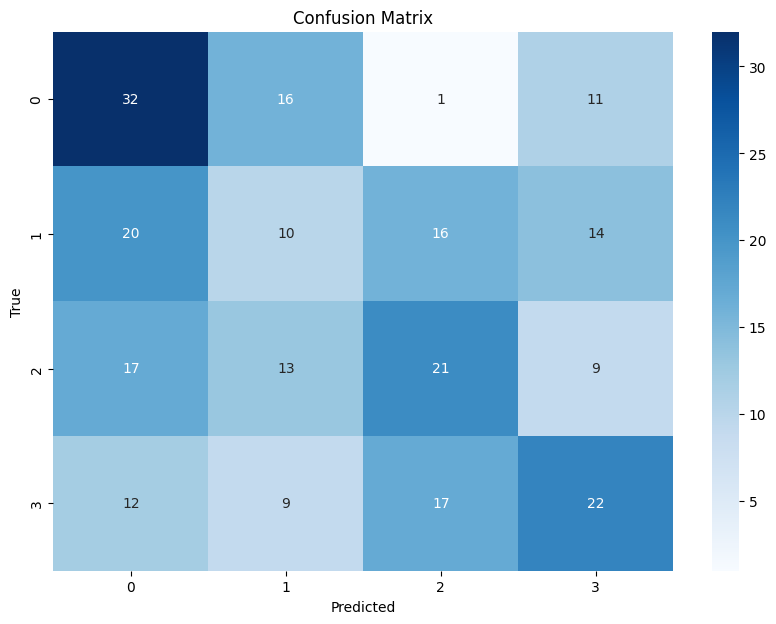

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_new, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_new), yticklabels=np.unique(y_new))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Precision, Recall, F1-Score:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, f1-score
precision = precision_score(y_new, predicted_classes, average='weighted')
recall = recall_score(y_new, predicted_classes, average='weighted')
f1 = f1_score(y_new, predicted_classes, average='weighted')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")


Precision: 34.45%
Recall: 35.42%
F1-Score: 34.59%


### ROC Curve and AUC:


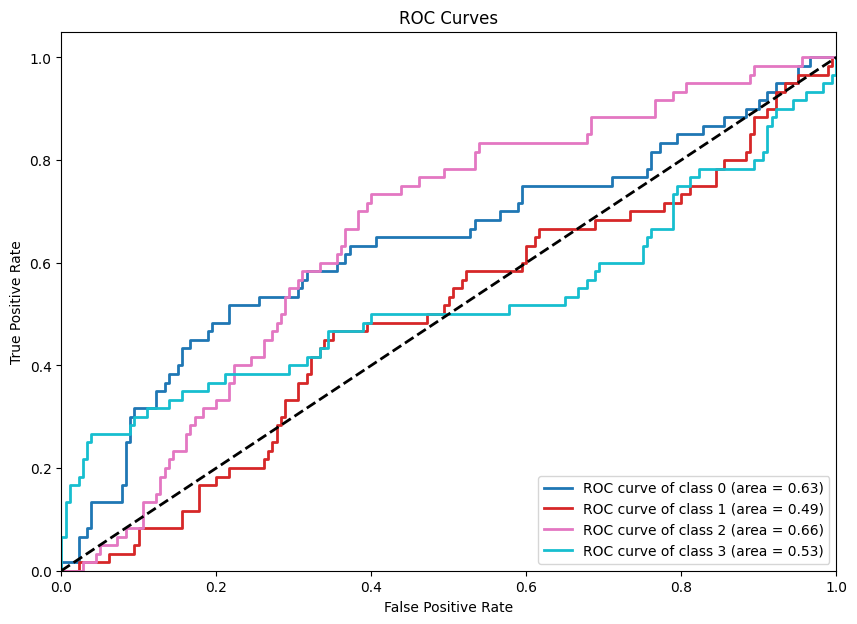

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC AUC
y_new_binarized = label_binarize(y_new, classes=np.unique(y_new))
n_classes = y_new_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_new_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap('tab10', n_classes)
for i, color in zip(range(n_classes), colors(range(n_classes))):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


### Class Distribution:

In [ ]:
# Checking the distribution of the predicted classes
unique, counts = np.unique(predicted_classes, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class Distribution in Predictions:")
for key, value in class_distribution.items():
    print(f"Class {key}: {value} samples")


Class Distribution in Predictions:
Class 0: 81 samples
Class 1: 48 samples
Class 2: 55 samples
Class 3: 56 samples


### Statistical Analysis Report:

In [ ]:
# Create a summary report
summary_report = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "class_distribution": class_distribution
}

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(summary_report, index=[0])
print("Statistical Analysis Summary Report:")
print(summary_df)


Statistical Analysis Summary Report:
   accuracy  precision    recall  f1_score  class_distribution
0  0.354167   0.344518  0.354167  0.345903                  81


## Full Code to Test a Single File on Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib
from tensorflow.keras.models import load_model

csp_file_name='/content/drive/MyDrive/FinalFilterOuput/blocks/subject_2_block_3_testing_50_CSP_Features.npz' #35.42%

# Load the .npz file
new_data = np.load(csp_file_name)


new_data['features'].shape


# Preprocess and clean numpy file
labels= new_data['labels']
labels= labels[:, 1]
labels.shape


unique, frequency = np.unique(labels,
                              return_counts = True)

# convert both into one numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",count)




# Load the .npz file

# Assuming 'Feature' and 'Label' are keys in the npz file
features = new_data['features']

# Function to clean feature strings
def clean_feature_string(feature_str):
    if isinstance(feature_str, str):
        cleaned = feature_str.strip('[]').replace(' ', ',').replace('\n', '')
        return cleaned.split(',') if cleaned else []
    return feature_str  # If it's already a list or array, return as is

# Convert the feature strings to lists of floats
cleaned_features = []
for feature in features:
    cleaned_feature = clean_feature_string(feature)
    if len(cleaned_feature) == 0:
        cleaned_feature = [0.0] * 10  # Handle empty features by filling with placeholder
    cleaned_features.append([float(i) for i in cleaned_feature])

# Convert cleaned_features to a numpy array
X_new = np.array(cleaned_features)
y_new = labels


# Standardize features
scaler_path = '/content/drive/MyDrive/MyOutput/final_training_scaler.pkl'
scaler = joblib.load(scaler_path)

X_new = scaler.transform(X_new)


print("Shape: ", X_new.shape)

# Reshape the data for the model if necessary (e.g., CNN input)
X_new_transformed = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)

print("X_new_transformed.shape", X_new_transformed.shape)


# Load the trained model
model_path ='/content/drive/MyDrive/MyOutput/final_cnn_model.h5'


model = load_model(model_path)
print(f"Model loaded from {model_path}")


# Assuming model and data are already loaded and prepared
from sklearn.metrics import accuracy_score
predictions = model.predict(X_new_transformed)
predicted_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_new, predicted_classes)
print("Overall accuracy on test data: {:.2%}".format(accuracy))

from sklearn.metrics import classification_report
report = classification_report(y_new, predicted_classes)
print('CNN Model Classification Report:')
print(report)



The values and their frequency are:
 [[ 0  1  2  3]
 [60 60 60 60]]
Shape:  (240, 50)
X_new_transformed.shape (240, 50, 1)
Model loaded from /content/drive/MyDrive/MyOutput/final_cnn_model.h5
8/8 [==============================] - 0s 7ms/step
Overall accuracy on test data: 32.92%
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.32      0.32        60
           1       0.28      0.32      0.30        60
           2       0.30      0.32      0.31        60
           3       0.42      0.37      0.39        60

    accuracy                           0.33       240
   macro avg       0.33      0.33      0.33       240
weighted avg       0.33      0.33      0.33       240



# **------------------------- Test multiple files ----------------------**

In [ ]:
import os
import numpy as np
import joblib
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

# Paths
blocks_folder_path = '/content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects'
scaler_path = '/content/drive/MyDrive/MyOutput/all_subjects_training_scaler.pkl'
model_path = '/content/drive/MyDrive/MyOutput/all_subjects_training_file_cnn_model.h5'
output_txt_path = '/content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/all_subjects_model_results.txt'

# Load the trained model
model = tf.keras.models.load_model(model_path)
print(f"Model loaded from {model_path}")

# Load the scaler
scaler = joblib.load(scaler_path)
print(f"Scaler loaded from {scaler_path}")

# Function to clean feature strings
def clean_feature_string(feature_str):
    if isinstance(feature_str, str):
        cleaned = feature_str.strip('[]').replace(' ', ',').replace('\n', '')
        return cleaned.split(',') if cleaned else []
    return feature_str  # If it's already a list or array, return as is

# Initialize a list to hold results
results = []

# Iterate through all files in the blocks folder
for root, dirs, files in os.walk(blocks_folder_path):
    for file in files:
        if file.endswith('.npz'):
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            # Load the .npz file
            new_data = np.load(file_path)

            # Extract features and labels
            features = new_data['features']
            labels = new_data['labels'][:, 1]  # Assuming the second column is the class label

            # Convert the feature strings to lists of floats
            cleaned_features = []
            for feature in features:
                cleaned_feature = clean_feature_string(feature)
                if len(cleaned_feature) == 0:
                    cleaned_feature = [0.0] * 10  # Handle empty features by filling with placeholder
                cleaned_features.append([float(i) for i in cleaned_feature])

            # Convert cleaned_features to a numpy array
            X_new = np.array(cleaned_features)
            y_new = labels

            # Standardize features
            X_new = scaler.transform(X_new)

            # Reshape the data for the model if necessary (e.g., CNN input)
            X_new_transformed = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)

            # Make predictions and evaluate
            predictions = model.predict(X_new_transformed)
            predicted_classes = np.argmax(predictions, axis=1)
            accuracy = accuracy_score(y_new, predicted_classes)
            report = classification_report(y_new, predicted_classes)

            # Print the accuracy
            print(f"Accuracy for {file}: {accuracy:.2%}")

            # Save the result
            results.append(f"File: {file}\nAccuracy: {accuracy:.2%}\nClassification Report:\n{report}\n\n")

# Write all results to the output text file
with open(output_txt_path, 'w') as f:
    for result in results:
        f.write(result)

print(f"Results saved to {output_txt_path}")


Model loaded from /content/drive/MyDrive/MyOutput/all_subjects_training_file_cnn_model.h5
Scaler loaded from /content/drive/MyDrive/MyOutput/all_subjects_training_scaler.pkl
Processing file: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_1_50_CSP_Features.npz
7/7 [==============================] - 0s 3ms/step
Accuracy for Subject_1_50_CSP_Features.npz: 97.00%
Processing file: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_2_50_CSP_Features.npz
8/8 [==============================] - 0s 5ms/step
Accuracy for Subject_2_50_CSP_Features.npz: 95.00%
Processing file: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_3_50_CSP_Features.npz
6/6 [==============================] - 0s 4ms/step
Accuracy for Subject_3_50_CSP_Features.npz: 96.67%
Processing file: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_4_50_CSP_Features.npz
8/8 [==============================] - 0s 3ms/step
Accur

# **------------------------- EEG FILE CLEANING ----------------------**

In [ ]:
import mne
import pickle
import numpy as np

from Inner_Speech_Dataset.Python_Processing.Events_analysis import Event_correction, add_condition_tag, add_block_tag
from Inner_Speech_Dataset.Python_Processing.Events_analysis import check_baseline_tags, delete_trigger
from Inner_Speech_Dataset.Python_Processing.Events_analysis import cognitive_control_check, standardize_labels
# from Inner_Speech_Dataset.Python_Processing.Data_extractions import extract_subject_from_bdf
from Inner_Speech_Dataset.Python_Processing.Utilitys import ensure_dir,sub_name, unify_names
# from utils.Utilitys import sub_name, unify_names       # noqa




# Processing Variables

# Root where the raw data are stored
root_dir = '/content/drive/MyDrive/'

# Root where the structured data will be saved
# It can be changed and saved in other direction
save_dir = root_dir + "derivatives/"

# #################### Filtering
# Cut-off frequencies
Low_cut = 0.5
High_cut = 100

# Notch filter in 50Hz
Notch_bool = True

# Downsampling rate
DS_rate = 4

# #################### ICA
# If False, ICA is not applied
ICA_bool = True
ICA_Components = None
ica_random_state = 23
ica_method = 'infomax'
max_pca_components = None
fit_params = dict(extended=True)

# #################### EMG Control
low_f = 1
high_f = 20
# Slide window design
# Window len (time in sec)
window_len = 0.5
# slide window step (time in sec)
window_step = 0.05

# Threshold for EMG control
std_times = 3

# Baseline
t_min_baseline = 0
t_max_baseline = 15

# Trial time
t_min = 1
t_max = 3.5

# Events ID
# Trials tag for each class.
# 31 = Arriba / Up
# 32 = Abajo / Down
# 33 = Derecha / Right
# 34 = Izquierda / Left
event_id = dict(Arriba=31, Abajo=32, Derecha=33, Izquierda=34)

# Baseline id
baseline_id = dict(Baseline=13)

# Report initialization
report = dict(Age=0, Gender=0, Recording_time=0, Ans_R=0, Ans_W=0)

# Montage
Adquisition_eq = "biosemi128"
# Get montage
montage = mne.channels.make_standard_montage(Adquisition_eq)

# Extern channels
Ref_channels = ['EXG1', 'EXG2']

# Gaze detection
Gaze_channels = ['EXG3', 'EXG4']

# Blinks detection
Blinks_channels = ['EXG5', 'EXG6']

# Mouth Moving detection
Mouth_channels = ['EXG7', 'EXG8']

# Demographic information
Subject_age = [56, 50, 34, 24, 31, 29, 26, 28, 35, 31]
Subject_gender = ['F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M']

In [ ]:
def extract_subject_from_bdf(local_file_path,N_S, N_B):
    # Name correction if N_Subj is less than 10
    num_s = sub_name(N_S)


    file_name=local_file_path
    print("this is the file name from data extraction",file_name)

    raw_data = mne.io.read_raw_bdf(input_fname=file_name, preload=True,
                                   verbose='WARNING')
    print("this is the raw data",raw_data)
    return raw_data, num_s

In [ ]:
def process_subject_session(local_file_path, subject_no, session_no):

    N_S = subject_no
    N_B = session_no

    print(type(N_S))
    print(type(N_B))

    # Initialize report
    report = dict()

    # Get Age and Gender
    report['Age'] = Subject_age[N_S-1]
    report['Gender'] = Subject_gender[N_S-1]

    print('Subject: ' + str(N_S))
    print('Session: ' + str(N_B))

    # Load data from BDF file
    rawdata, Num_s = extract_subject_from_bdf(local_file_path, N_S, N_B)

    print('Data loaded')
    print('Referencing')

    # Referencing
    rawdata.set_eeg_reference(ref_channels=Ref_channels)

    print('Montage')
    if Notch_bool:
        # Notch filter
        rawdata = mne.io.Raw.notch_filter(rawdata, freqs=50)

    print(rawdata.info)

    # Filtering raw data
    print('Filtering')
    rawdata.filter(Low_cut, High_cut)

    # Get events
    # Subject 10 on Block 1 have a spurious trigger
    if (N_S == 10 and N_B == 1):
        events = mne.find_events(rawdata, initial_event=True,
                                 consecutive=True, min_duration=0.002)
    else:
        events = mne.find_events(rawdata, initial_event=True,
                                 consecutive=True)

    events = check_baseline_tags(events)

    # Check and Correct event
    events = Event_correction(events=events)

    # Replace the raw events with the new corrected events
    rawdata.event = events

    report['Recording_time'] = int(np.round(rawdata.last_samp/rawdata.info['sfreq']))

    # Cognitive Control
    report['Ans_R'], report['Ans_W'] = cognitive_control_check(events)

    # Save report
    file_path = save_dir + Num_s + '/ses-0' + str(N_B)
    ensure_dir(file_path)

    pickle_file_name = file_path + '/' + Num_s + '_ses-0'+str(N_B)+'_report.pkl'
    with open(pickle_file_name, 'wb') as output:
        pickle.dump(report, output, pickle.HIGHEST_PROTOCOL)

    # EXG
    picks_eog = mne.pick_types(rawdata.info, eeg=False, stim=False, include=['EXG1', 'EXG2', 'EXG3', 'EXG4','EXG5', 'EXG6', 'EXG7', 'EXG8'])

    epochsEOG = mne.Epochs(rawdata, events, event_id=event_id, tmin=-0.5,
                               tmax=4, picks=picks_eog, preload=True,
                               detrend=0, decim=DS_rate)

    # Save EOG
    eog_file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_exg-epo.fif'
    epochsEOG.save(eog_file_name, fmt='double',
                       split_size='2GB', overwrite=True)

    # Baseline
    t_baseline = (events[events[:, 2] == 14, 0]-events[events[:, 2] == 13, 0]) / rawdata.info['sfreq']
    t_baseline = t_baseline[0]
    Baseline = mne.Epochs(rawdata, events, event_id=baseline_id, tmin=0,
                              tmax=round(t_baseline), picks='all',
                              preload=True, detrend=0, decim=DS_rate,
                              baseline=None)

    # Save Baseline
    baseline_file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_baseline-epo.fif'
    Baseline.save(baseline_file_name, fmt='double',
                      split_size='2GB', overwrite=True)

    # Epoching and decimating EEG
    picks_eeg = mne.pick_types(rawdata.info, eeg=True,
                                   exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4',
                                            'EXG5', 'EXG6', 'EXG7', 'EXG8'],
                                   stim=False)

    epochsEEG = mne.Epochs(rawdata, events, event_id=event_id, tmin=-0.5,
                               tmax=4, picks=picks_eeg, preload=True,
                               detrend=0, decim=DS_rate, baseline=None)

    # ICA Processing
    if ICA_bool:
        # Get a full trials including EXG channels
        picks_vir = mne.pick_types(rawdata.info, eeg=True,
                                   include=['EXG1', 'EXG2', 'EXG3', 'EXG4',
                                            'EXG5', 'EXG6',
                                            'EXG7', 'EXG8'],
                                   stim=False)
        epochsEEG_full = mne.Epochs(rawdata, events, event_id=event_id,
                                    tmin=-0.5, tmax=4,
                                    picks=picks_vir, preload=True,
                                    detrend=0, decim=DS_rate,
                                    baseline=None)

        # Liberate Memory for ICA processing
        del rawdata

        # Creating the ICA object
        ica = mne.preprocessing.ICA(n_components=ICA_Components,
                                    random_state=ica_random_state,
                                    method=ica_method,
                                    fit_params=fit_params)

        # Fit ICA, calculate components
        ica.fit(epochsEEG)
        ica.exclude = []

        # Detect sources by correlation
        exg_inds_EXG3, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                      ch_name='EXG3')
        ica.exclude.extend(exg_inds_EXG3)

        # Detect sources by correlation
        exg_inds_EXG4, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                      ch_name='EXG4')
        ica.exclude.extend(exg_inds_EXG4)

        # Detect sources by correlation
        exg_inds_EXG5, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                      ch_name='EXG5')
        ica.exclude.extend(exg_inds_EXG5)

        # Detect sources by correlation
        exg_inds_EXG6, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                      ch_name='EXG6')
        ica.exclude.extend(exg_inds_EXG6)

        # Detect sources by correlation
        exg_inds_EXG7, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                      ch_name='EXG7')
        ica.exclude.extend(exg_inds_EXG7)

        # Detect sources by correlation
        exg_inds_EXG8, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                      ch_name='EXG8')
        ica.exclude.extend(exg_inds_EXG8)

        print("Applying ICA")
        ica.apply(epochsEEG)

    # Save EEG
    eeg_file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_eeg-epo.fif'
    epochsEEG.save(eeg_file_name, fmt='double',
                   split_size='2GB', overwrite=True)

    # Standardize and save events
    events = add_condition_tag(events)
    events = add_block_tag(events, N_B=N_B)
    events = delete_trigger(events)
    events = standardize_labels(events)

    # Save events
    events_file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_events.dat'
    events.dump(events_file_name)

    return {
        'eog_file': eog_file_name,
        'baseline_file': baseline_file_name,
        'pickle_file': pickle_file_name,
        'eeg_file': eeg_file_name,
        'events_file': events_file_name
    }

# Example call
local_file = '/content/drive/MyDrive/FYPD_Dataset/sub-02/ses-02/eeg/sub-02_ses-02_task-innerspeech_eeg.bdf'
file_paths =
print(file_paths)


results = process_subject_session(local_file, 2, 1)
print("this is the result",results)



<class 'int'>
<class 'int'>
Subject: 2
Session: 1
this is the file name from data extraction /content/drive/MyDrive/FYPD_Dataset/sub-02/ses-02/eeg/sub-02_ses-02_task-innerspeech_eeg.bdf
this is the raw data <RawEDF | sub-02_ses-02_task-innerspeech_eeg.bdf, 137 x 1692672 (1653.0 s), ~1.73 GB, data loaded>
Data loaded
Referencing
Montage
<Info | 9 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 136 EEG, 1 Stimulus
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 208.0 Hz
 meas_date: 2019-08-20 13:50:49 UTC
 nchan: 137
 projs: []
 sfreq: 1024.0 Hz
 subject_info: 1 item (dict)
>
Filtering
No Warnings, no corrections of events
Start OK
Blocks OK
Tags OK
Marks OK
Cognitive control OK
Warning, 1 of [16] Answers are wrong


<ipython-input-31-5e61e970f335>:72: RuntimeWarning: The measurement information indicates a low-pass frequency of 100.0 Hz. The decim=4 parameter will result in a sampling frequency of 256.0 Hz, which can cause aliasing artifacts.
  epochsEOG = mne.Epochs(rawdata, events, event_id=event_id, tmin=-0.5,
<ipython-input-31-5e61e970f335>:84: RuntimeWarning: The measurement information indicates a low-pass frequency of 100.0 Hz. The decim=4 parameter will result in a sampling frequency of 256.0 Hz, which can cause aliasing artifacts.
  Baseline = mne.Epochs(rawdata, events, event_id=baseline_id, tmin=0,
<ipython-input-31-5e61e970f335>:100: RuntimeWarning: The measurement information indicates a low-pass frequency of 100.0 Hz. The decim=4 parameter will result in a sampling frequency of 256.0 Hz, which can cause aliasing artifacts.
  epochsEEG = mne.Epochs(rawdata, events, event_id=event_id, tmin=-0.5,
<ipython-input-31-5e61e970f335>:112: RuntimeWarning: The measurement information indicates 

Applying ICA


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1055 and the array at index 1 has size 1054